<a href="https://colab.research.google.com/github/titiksha09/Calories-Burnt-Predicition/blob/main/Calories_Burnt_Predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from xgboost import XGBRegressor

In [45]:
calories = pd.read_csv('calories.csv')
calories.head()



,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [46]:
exercise = pd.read_csv('exercise.csv')
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Now , we will combine both the data set , to calculate our goal

In [47]:


combined_data = pd.concat([exercise, calories['Calories']], axis=1)
combined_data.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [48]:
combined_data.shape #getting the number of rows and columns

(15000, 9)

In [49]:
combined_data.info() #to check missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [50]:
combined_data.isnull().sum() #to check missing values

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [51]:
# getting some statistical measures about the data
combined_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visulation

In [52]:
sns.set()

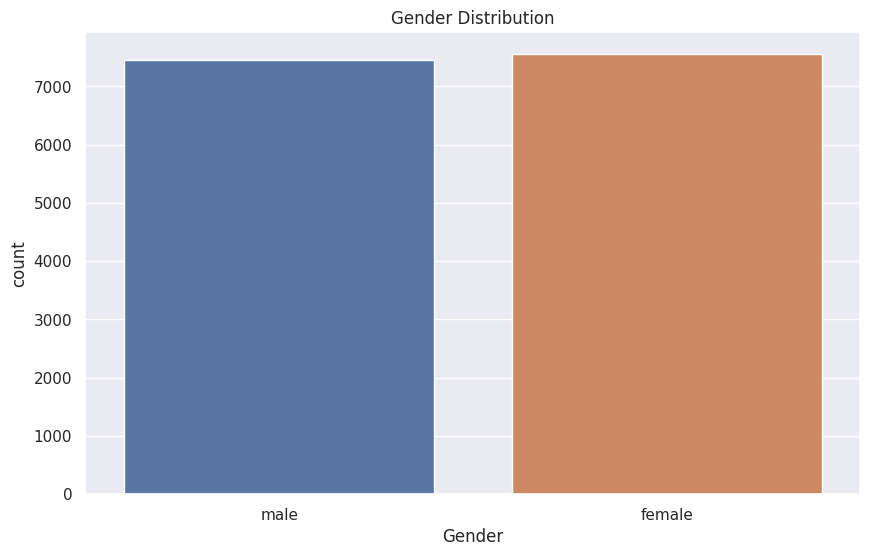

In [53]:
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', data=combined_data, hue='Gender')
plt.title('Gender Distribution')
plt.show()

<ipython-input-54-7355ff9b49d1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data['Age'])


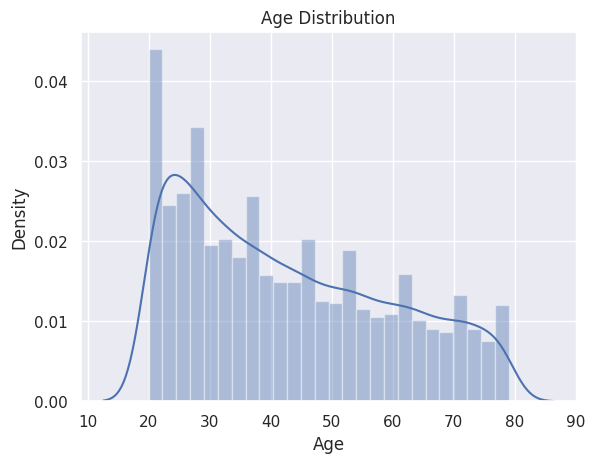

In [54]:
sns.distplot(combined_data['Age'])
plt.title('Age Distribution')
plt.show()

<ipython-input-55-9776612c805d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data['Height'])


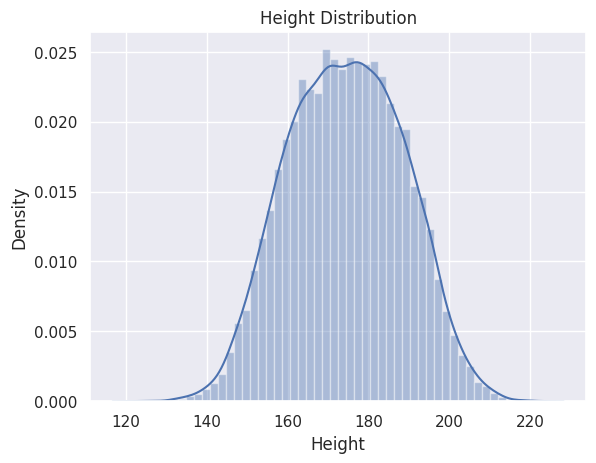

In [55]:
sns.distplot(combined_data['Height'])
plt.title('Height Distribution')
plt.show()

<ipython-input-56-704dc71a4935>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data['Weight'])


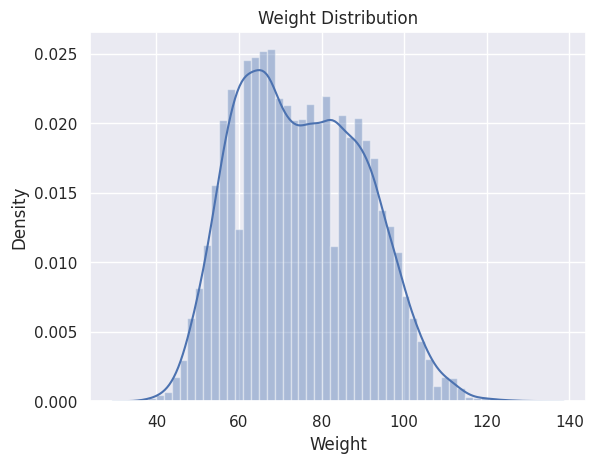

In [56]:
sns.distplot(combined_data['Weight'])
plt.title('Weight Distribution')
plt.show()

<ipython-input-57-7f9a0e4dc7ff>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data['Heart_Rate'])


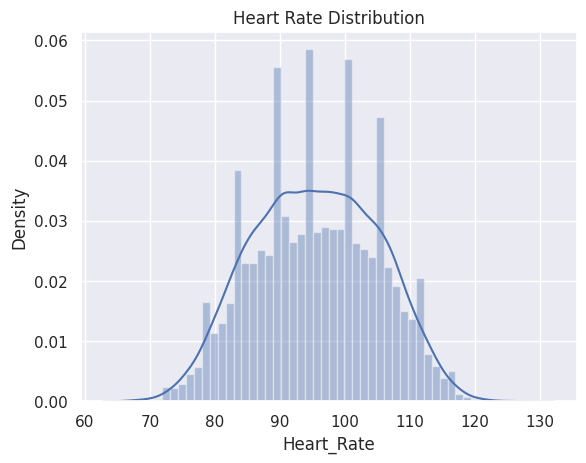

In [57]:
sns.distplot(combined_data['Heart_Rate'])
plt.title('Heart Rate Distribution')
plt.show()

finding correlation in the dataset-
1.positive (directly poropotional)
2.negative

In [58]:
plt.figure(figure=(10,10))
sns.heatmap(combined_data.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

RuntimeError: Can not put single artist in more than one figure

In [ ]:
plt.figure(figsize=(10,10)) # Use figsize for dimensions
sns.heatmap(combined_data.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
# Convert 'Gender' column to numerical representation before calculating correlation
combined_data['Gender_Encoded'] = combined_data['Gender'].map({'male': 0, 'female': 1})

# Calculate correlation on numerical columns only
plt.figure(figsize=(10,10))
sns.heatmap(combined_data.select_dtypes(include=['number']).corr(),
            cbar=True, square=True, fmt='.1f',
            annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

In [59]:
combined_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)
combined_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Training our model

In [60]:
x = combined_data.iloc[:,1:-1]
y = combined_data['Calories']
print(x)
print(y)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]
0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999   

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [62]:
model = XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [63]:
y_pred = model.predict(x_test)
print(y_pred)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


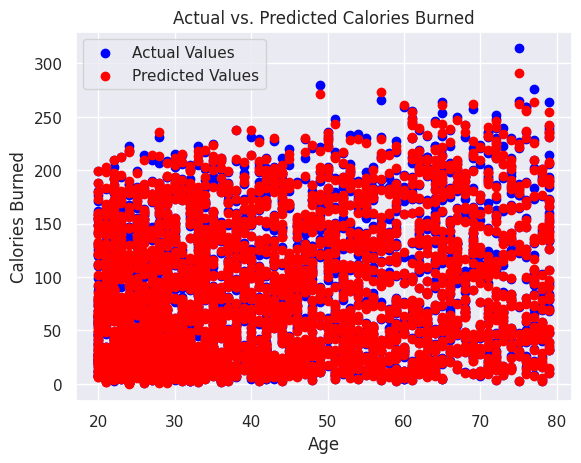

In [65]:
# prompt: visulase the model made

import matplotlib.pyplot as plt

# Plot the actual values
plt.scatter(x_test['Age'], y_test, color='blue', label='Actual Values')

# Plot the predicted values
plt.scatter(x_test['Age'], y_pred, color='red', label='Predicted Values')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Calories Burned')
plt.title('Actual vs. Predicted Calories Burned')

# Add legend and show plot
plt.legend()
plt.show()


In [66]:
# prompt: predict adj r squared value

from sklearn.metrics import r2_score

r2_square = r2_score(y_test, y_pred)
adjusted_r_squared = 1 - (1-r2_square)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

print("The adjusted R-squared value is:", adjusted_r_squared)


The adjusted R-squared value is: 0.9987978184791558


In [67]:
# prompt: calculate the r squared value

from sklearn.metrics import r2_score

y_pred = model.predict(x_test)
r2_square = r2_score(y_test, y_pred)

print("The R-squared value is:", r2_square)


The R-squared value is: 0.998800624504713


In [68]:
# prompt: calculate for a new input

import pandas as pd
new_input = {
  "Gender": "male",
  "Age": 30,
  "Height": 170,
  "Weight": 70,
  "Duration": 60,
  "Heart_Rate": 120
}

# Convert new_input to a dataframe
new_input_df = pd.DataFrame([new_input])

# Encode the "Gender" column
new_input_df["Gender_Encoded"] = new_input_df["Gender"].map({"male": 0, "female": 1})

# Select relevant features
new_input_data = new_input_df.iloc[:, 1:-1]

# Predict calories burned
predicted_calories = model.predict(new_input_data)[0]

print(f"Predicted calories burned for the new input: {predicted_calories}")


ValueError: feature_names mismatch: ['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp'] ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate']
expected Gender, Body_Temp in input data

In [ ]:
# prompt: calculate for a new input

import pandas as pd
new_input = {
  "Gender": "male",
  "Age": 30,
  "Height": 170,
  "Weight": 70,
  "Duration": 60,
  "Heart_Rate": 120,
  "Body_Temp": 37 # Add the missing 'Body_Temp' feature
}

# Convert new_input to a dataframe
new_input_df = pd.DataFrame([new_input])

# Encode the "Gender" column
new_input_df["Gender"] = new_input_df["Gender"].map({"male": 0, "female": 1}) # Overwrite 'Gender' with encoded values

# Select relevant features, including 'Gender' and 'Body_Temp'
new_input_data = new_input_df[['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']]

# Predict calories burned
predicted_calories = model.predict(new_input_data)[0]

print(f"Predicted calories burned for the new input: {predicted_calories}")

In [69]:
# prompt: calculate for a new input

import pandas as pd
new_input = {
  "Gender": "male",
  "Age": 30,
  "Height": 170,
  "Weight": 70,
  "Duration": 60,
  "Heart_Rate": 120,
  "Body_Temp": 37 # Add the missing 'Body_Temp' feature
}

# Convert new_input to a dataframe
new_input_df = pd.DataFrame([new_input])

# Encode the "Gender" column
new_input_df["Gender"] = new_input_df["Gender"].map({"male": 0, "female": 1}) # Overwrite 'Gender' with encoded values

# Select relevant features, including 'Gender' and 'Body_Temp'
new_input_data = new_input_df[['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']]

# Predict calories burned
predicted_calories = model.predict(new_input_data)[0]

print(f"Predicted calories burned for the new input: {predicted_calories}")

Predicted calories burned for the new input: 234.81236267089844
